# Winter 2022 Data Science Intern Challenge Submission

[Skip To Question 1 Answers](#Question-1-Answers)

[Skip To Question 2 Answers](#Question-2)

## Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of \$3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot sizes for readability 
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100

In [2]:
# Import and check data
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
# Get stats for 'order_amount' column
df[['order_amount']].describe()

,order_amount
count,5000.000000
mean,3145.128000
std,41282.539349
min,90.000000
25%,163.000000
50%,284.000000
75%,390.000000
max,704000.000000


Here we can confirm that the naively calculated average order value is in fact **\$3145.13**. We can also see that the standard deviation is *very* high, as well as the maximum value of **\$704,000.00** for *one* order. First, let's visualize the data with some plots.

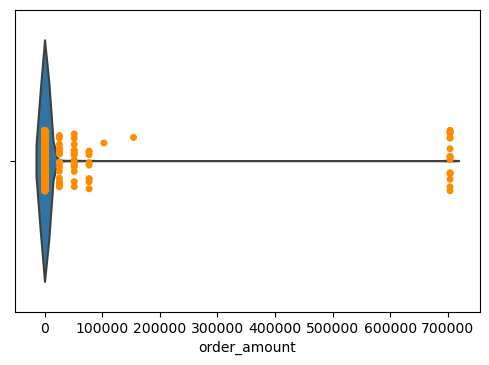

In [4]:
# Visualize Violin Plot and Strip Plot
sns.violinplot(x='order_amount',data=df);
sns.stripplot(x='order_amount',data=df,color='#ff8c00');

As we can see from the plot, almost all the datapoints fall in the low `order_amount` range. However, we have quite a few very large order amounts between upwards of **\$10,000.00** to over **\$700,000.00**. We'll take a look at the data more closely to see where these large amounts are coming from.

In [5]:
# Show first 25 highest order_amount values
df.sort_values(by='order_amount',ascending=False).head(25)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


We can see some odd activity here, as there are multiple of the same transactions, each for **\$704,000.00**, from the same `shop_id`, by the same `user_id`, and all created at **4:00:00** a few days apart. The next few transactions are from another shop, however they vary more by having different `user_id`, `total_items`, `payment_method` and `created_at`. We'll reinvestigate these two shops [here](#Bonus-Analysis:-Suspicious-Activity).

In [6]:
# Here we take the counts of the highest order amounts
df.groupby(by='order_amount', as_index=False).agg({'order_id': pd.Series.nunique}).sort_values(by='order_amount',ascending=False).rename(columns={'order_id': 'count'}).head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


Looking at the counts of each unique `order_amount`, we see the same results as above. The first six unique `order_amount` are much bigger than the rest, which are the six 'outliers' we saw before in the violin plot. Again we can notice that the **\$704,000.00** is the repeated orders from one shop. We can also see that each other large order is a multiple of **\$25,725.00**.

One way to tackle the problem we are facing is to perform some outlier detection and elimination. A method of doing this is using the **Interquartile Rule**. For this rule we take the first quartile $Q1$ and the third quartile $Q3$, which represent the first 25% of the data and the first 75% of the data. With these, we compute the interquartile range (IQR) as $IQR = Q3 - Q1$. Any points that are $1.5*IQR$ smaller than $Q1$ or $1.5*IQR$ larger than $Q3$ are deemed outliers and removed from the dataset.

In [7]:
# Calculate quartiles and interquartile range
Q1 = df['order_amount'].quantile(.25)
Q3 = df['order_amount'].quantile(.75)
IQR = Q3-Q1

print('Min Value:',Q1-1.5*IQR)
print('Max Value:',Q3+1.5*IQR)
# Filter out all values that are considered outliers
iqr_filt = df['order_amount'].between(Q1-1.5*IQR, Q3+1.5*IQR, inclusive=True)
iqr_df = pd.DataFrame(df.loc[iqr_filt, 'order_amount'])

Min Value: -177.5
Max Value: 730.5


From the calculations, all values between -177.5 and 730.5 will be kept, the rest will be removed. Since there are no negative values for `order_amount`, only the upper bound matters in this case. 

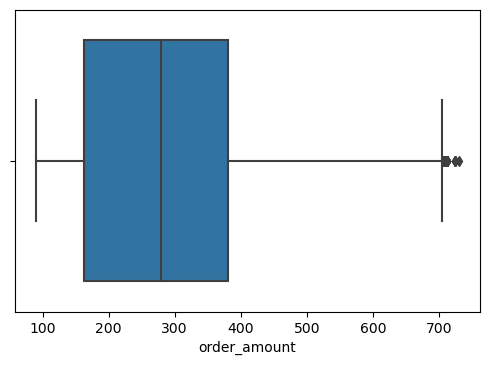

In [8]:
# Plot boxplot of new data
sns.boxplot(x='order_amount',data=iqr_df);

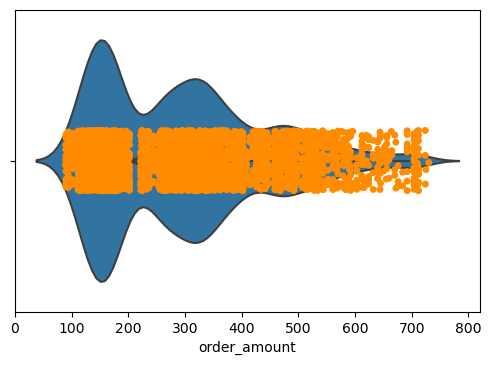

In [9]:
# Violin plot for comparison
sns.violinplot(x='order_amount',data=iqr_df);
sns.stripplot(x='order_amount',data=iqr_df,color='#ff8c00');

Using the filtered data, we made plots that have the interquartile rule outliers removed. From the boxplot, we can see that there are still some outliers based on the new IQR, but not many and not as extreme as before. Similarly, we can now see the density of the distribution much more clearly with the violin plot with the highest density of `order_amount` around the **\$100-\$400** range.

In [10]:
iqr_df[['order_amount']].describe()

,order_amount
count,4859.000000
mean,293.715374
std,144.453395
min,90.000000
25%,162.000000
50%,280.000000
75%,380.000000
max,730.000000


With the outliers removed, the new descriptive statistics of the `order_amount` are shown above. The new **average order value (AOV)** is **\$293.72**, a number much more representative of the data, and one that makes more sense in the bigger context of sneaker shops.

### Question 1 Answers

**a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

What was wrong in the naive average order value calculation was that the mean was heavily skewed due to a few extreme outliers. A better way to evaluate the data would be to recalculate the mean with the outliers removed, or to use a different metric.

**b) What metric would you report for this dataset?**

For this dataset, I would report the **median order value (MOV)**. The median is much less succeptible to the effects of large outliers. In addition, once the outliers were removed, the new median was **\$280.00**, compared to the original median of **\$284.00**. This shows that we could have simply reported the original **MOV** instead of the **AOV**.

**c) What is its value?**

The value of the reported metric, the **median order value** is **\$284.00** from the original dataset.

## Bonus Analysis: Suspicious Activity

In this case, instead of removing outliers based on the interquartile range, we will remove the shops based on `shop_id` that show 'suspicious activity'. We've seen the odd activity based on repeated order from **shop 78**. We will also investigate **shop 42** and their **\$25,725.00** pair of shoes.

In [11]:
# Compute price per item
df['price_per_item'] = df['order_amount']/df['total_items']

In [12]:
# Display highest prices per item
df.groupby(by='shop_id', as_index=False).agg({'order_amount': np.mean, 'price_per_item': np.mean}).sort_values(by='price_per_item',ascending=False).rename(columns={'order_amount': 'mean_order_amount'}).head(5)

,shop_id,mean_order_amount,price_per_item
77,78,49213.043478,25725.0
41,42,235101.490196,352.0
11,12,352.698113,201.0
88,89,379.147541,196.0
98,99,339.444444,195.0


Knowing that each shop only sells one model of shoe, we computed the `price_per_item` for each shop. When ordered by magnitude, we can see that **shop 42** stands out as they sell a pair of shoes for **\$25,725.00**. This is a big outlier compared to the other shoe prices, and contributes to the **AOV** value being so high.

Instead of removing all outliers based on the interquartile rule, we will remove just the two shops that we've flagged for *suspicious activity*. (**Note:** This does not mean that these shops are actually carrying out fraudulent activity, but for the purposes of the analysis they are not representative of the other shops.)

In [13]:
# Remove shop 42 and 78 from dataset
drop_df = df.drop(df[(df.shop_id == 42)|(df.shop_id == 78)].index)

# Get new descriptive statistics
drop_df[['order_amount','price_per_item']].describe()

,order_amount,price_per_item
count,4903.000000,4903.000000
mean,300.155823,150.400163
std,155.941112,23.851202
min,90.000000,90.000000
25%,163.000000,132.000000
50%,284.000000,153.000000
75%,386.500000,166.000000
max,1086.000000,201.000000


Here we can see that by only removing the order history from two shops, we've acheived an average order value (AOV) of **\$300.16**, another much more reasonable number. Interestingly, the median is still **\$284.00**, the same as the reported metric above for the un-altered data. Below in the boxplot we can see that there are more 'outliers', however this dataset would be more representative of the original data.

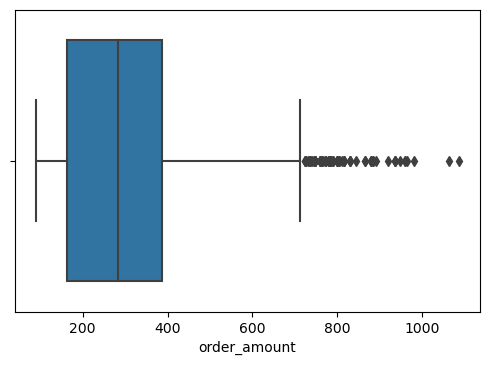

In [14]:
# Boxplot
sns.boxplot(x='order_amount',data=drop_df);

# Question 2

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.


**a) How many orders were shipped by Speedy Express in total?**

**Speedy Express** shipped **54** orders in total.

SQL Solution:
~~~~sql
SELECT COUNT(*)
FROM Orders
WHERE ShipperID =
  (SELECT ShipperID
  FROM Shippers
  WHERE ShipperName == "Speedy Express");
~~~~  
Method:  
Find the `ShipperID` from the `Shippers` table and count all records in the `Orders` table with that ID.

**b) What is the last name of the employee with the most orders?**

The last name of the employee with the most orders is **Peacock** with **40** orders.

SQL Solution:
~~~~sql
SELECT e.LastName
FROM Employees e
JOIN Orders o
ON e.EmployeeID = o.EmployeeID
GROUP BY e.LastName
ORDER BY COUNT(*) DESC
LIMIT 1;
~~~~  
Method:  
Join `Employees` with `Orders` and group by employees. Count the number of order for each last name. Limit to 1 in descending order to find the max.

**c) What product was ordered the most by customers in Germany?**

The most ordered product by german customers was **Boston Crab Meat** with **160** total units ordered.

SQL Solution:
~~~~sql
SELECT p.ProductName, SUM(d.Quantity) AS Quantity
FROM Products p JOIN OrderDetails d
	ON p.productID = d.productID
JOIN Orders o
	ON d.orderID = o.orderID
JOIN Customers c
	ON o.customerID = c.customerID
WHERE c.Country == 'Germany'
GROUP BY p.productName
ORDER BY Quantity DESC
LIMIT 1;

~~~~  
Method:  
Join `Products`, `OrderDetails`, `Orders`, and `Customers`. Filter the `Country` to Germany only. Group by `ProductName` and find the sum of `Quantity` for each `ProductName`. Order by descending and limit to 1 to find the maximum quantity and the associated product name.